# Crop Recommendation System
 Abubakar Abdulkadir (2023)

<img src='images/crop.jpg' />

## INTRODUCTION

Different crops require different conditions to grow optimally. Some crops will prefer conditions which might have been considered harsh to others. The ability to tell which crop will grow better in what condition and environmental factor is invaluable to improving agricultural yields.

In this project, we considered developing a classification system to predict optimall crops to be grown based on the environmental conditions and nutrient level of the soil. We explored the dataset, cleaned it, then created several classification models to select the best performing one.

This phase, represents the model creation phase of the vnicom hands-on project. At the end of this project. We intend to host it as an API for consumption.

## IMPORT PACKAGES

In [152]:
# data loading and manipulation libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# data modelling 


# model evaluation

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In this project, the major language is python with its machine learning libraries sklearn, pandas, numpy and matplotlib.

## IMPORT DATASETS

In [67]:
df = pd.read_csv('datasets/Crop_recommendation.csv')

The crop recommendation dataset was gotten from <a href='https://www.kaggle.com/datasets/aksahaha/crop-recommendation'> kaggle </a>. The dataset is download and placed inside the dataset directory of this project. 

## EXPLORATORY DATA ANALYSIS (EDA)

In this phase of the project, the dataset was analyzed and investigated to summarize their main characteristics. It helps determine how best to manipulate the dataset to achieve optimal model performance by leveraging the dataset patterns, spoting and handling anomalies, testinghypothesis, or checking assumptions.

### Brief Overview

In [68]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


The dataset has 10 columns with 2200 entries. It contains all the independent variables as numerical with only the 'label' variable which is the target variable as object. The dataset also contains two unnammed variables which contains no values. 

###### suggestions for preprocessing
- drop the Unnamed variables
- Encode the label variable to numerical using label Encoder

### Target Variable

In this EDA step, the target variable label is visualized to know how each class is represented. 

<Axes: xlabel='label', ylabel='count'>

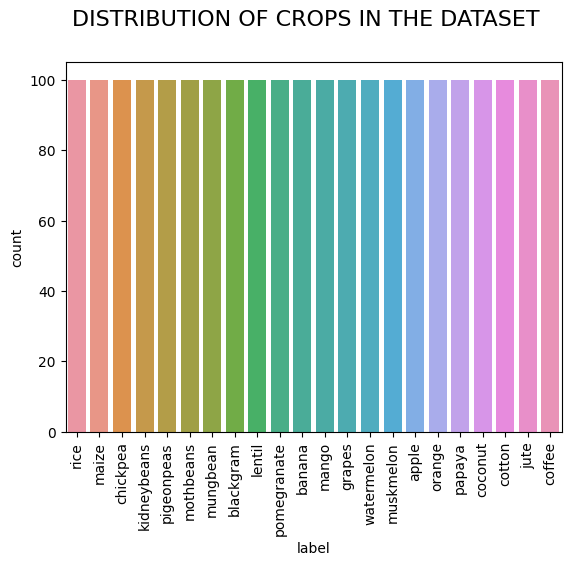

In [70]:
plt.xticks(rotation=90)
plt.suptitle('DISTRIBUTION OF CROPS IN THE DATASET', size=16, y=0.99);
sns.countplot(x='label', data=df)

The crops in the dataset is evenly distributed. All the crops have 100 entries each. There is no need for any preprocessing in this regard.

### Predictor Variables

In this section, we consider the distribution of the predictor variables to understand the nature of the dataset we are training on.

[Text(0.5, 1.0, 'Rainfall'), Text(0.5, 0, 'Amount')]

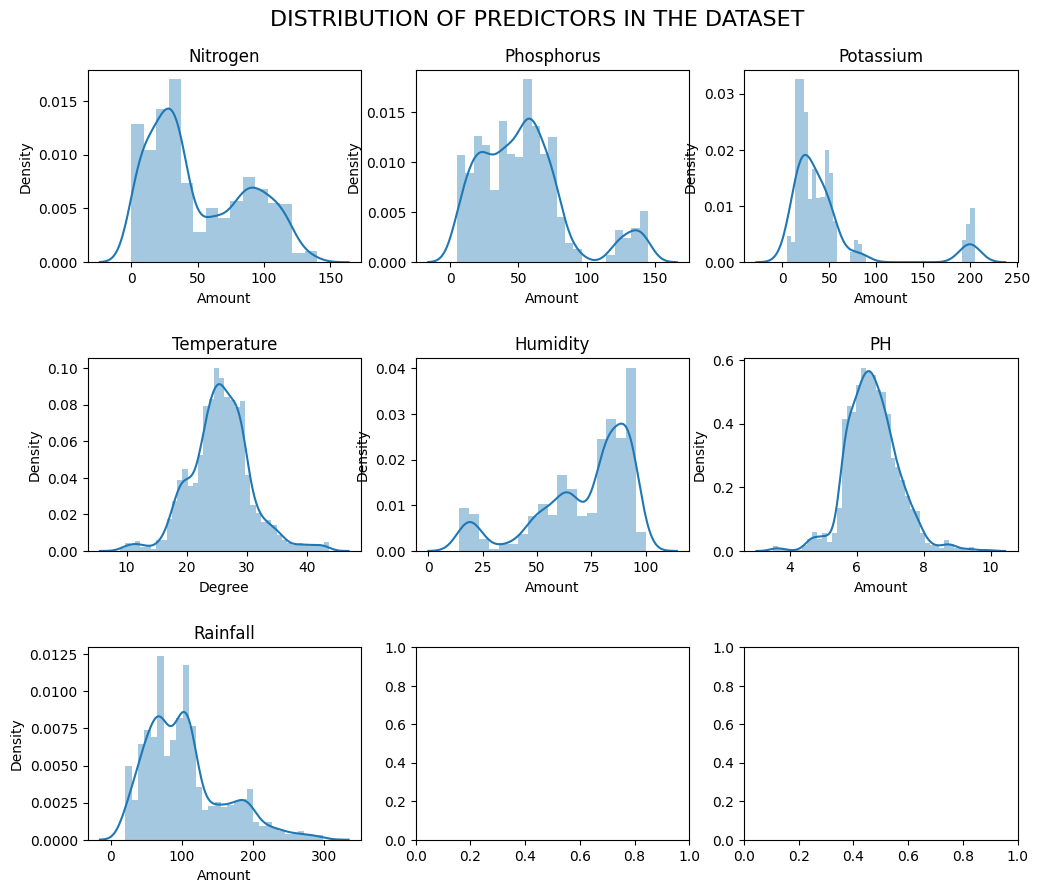

In [71]:
fig, ax = plt.subplots(3,3, figsize=(12,10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.suptitle('DISTRIBUTION OF PREDICTORS IN THE DATASET', size=16, y=0.94);

sns.distplot(x=df['Nitrogen'], ax=ax[0][0]).set(title='Nitrogen', xlabel='Amount')
sns.distplot(x=df['phosphorus'], ax=ax[0][1]).set(title='Phosphorus', xlabel='Amount')
sns.distplot(x=df['potassium'], ax=ax[0][2]).set(title='Potassium', xlabel='Amount')
sns.distplot(x=df['temperature'], ax=ax[1][0]).set(title='Temperature', xlabel='Degree')
sns.distplot(x=df['humidity'], ax=ax[1][1]).set(title='Humidity', xlabel='Amount')
sns.distplot(x=df['ph'], ax=ax[1][2]).set(title='PH', xlabel='Amount')
sns.distplot(x=df['rainfall'], ax=ax[2][0]).set(title='Rainfall', xlabel='Amount')

### Relationship between Predictors and the Target Variable

<Axes: xlabel='label', ylabel='Nitrogen'>

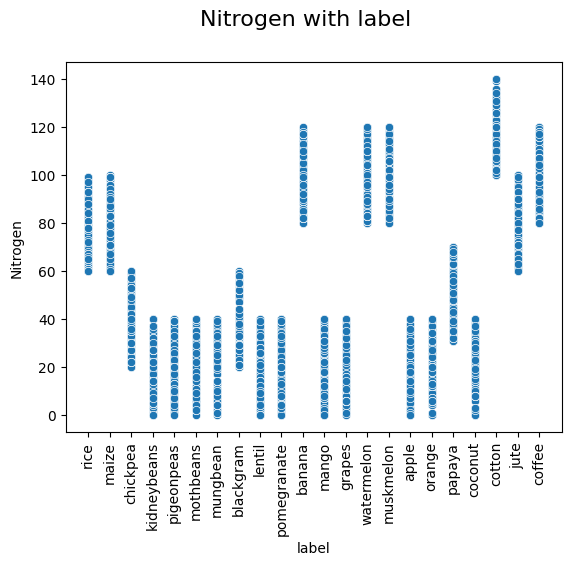

In [72]:
plt.xticks(rotation=90)
plt.suptitle('Nitrogen with label', size=16, y=0.99);
sns.scatterplot(x=df['label'], y=df['Nitrogen'])

This feature individually will contribute much to the model performance as it distinguishes the different crops in the dataset

<Axes: xlabel='label', ylabel='potassium'>

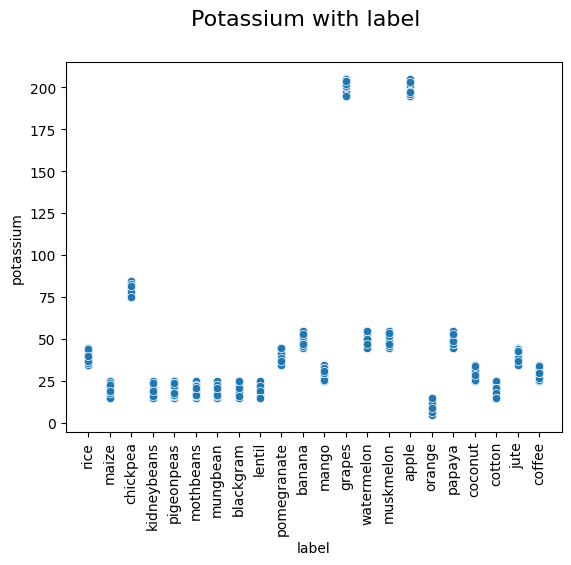

In [73]:
plt.xticks(rotation=90)
plt.suptitle('Potassium with label', size=16, y=0.99);
sns.scatterplot(x=df['label'], y=df['potassium'])

<Axes: xlabel='Nitrogen', ylabel='potassium'>

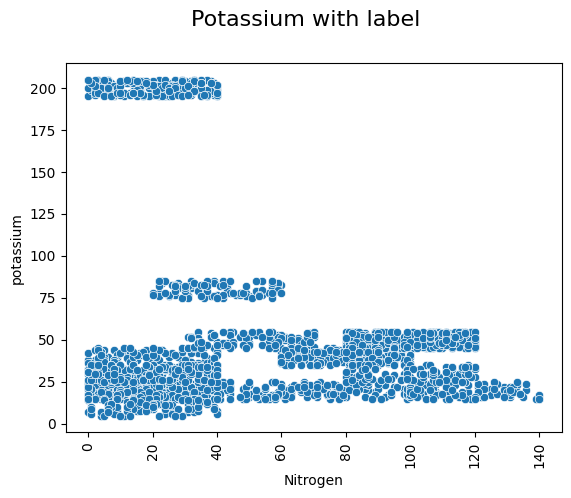

In [74]:
plt.xticks(rotation=90)
plt.suptitle('Potassium with label', size=16, y=0.99);
sns.scatterplot(x=df['Nitrogen'], y=df['potassium'])

## DATA PREPROCESSING

### Droping the Unnamed Vatriables

In [76]:
df_new = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)

### Encoding Categorical Variables

In [153]:
encoder = LabelEncoder()

In [154]:
df_new['label'] = encoder.fit_transform(df_new['label'])